# Recommendation system - Google Store Apps

# importing libraries

In [1]:
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
df_1 = pd.read_csv("googleplaystore.csv")
df_2 = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
df_1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
df_2.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [5]:
df_1.shape

(10841, 13)

In [6]:
df_2.shape

(64295, 5)

In [7]:
df_1.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [8]:
df_2.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

In [9]:
df_1['Reviews'].describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

In [10]:
#detect null cols and null rate
nulls = [i for i in df_1.isna().any().index if df_1.isna().any()[i]==True]
rates = []
counts = []
for i in nulls:    
    rates.append((df_1[i].isna().sum()/df_1.shape[0])*100)
    counts.append(df_1[i].isna().sum())
null_df = pd.DataFrame.from_dict({"Col":nulls,"Count":counts,"Null_Rates":rates})
null_df

Col  Count  Null_Rates
0          Rating   1474   13.596532
1            Type      1    0.009224
2  Content Rating      1    0.009224
3     Current Ver      8    0.073794
4     Android Ver      3    0.027673

In [11]:
df_1["Category"]=[each.replace("_"," ") for each in df_1.Category]
df_1["Price"]=[str(each.replace("$","")) for each in df_1.Price]

In [12]:
df_1.Reviews = pd.to_numeric(df_1.Reviews, errors='coerce')
df_1.Price = pd.to_numeric(df_1.Price, errors='coerce')
df_1.Rating = pd.to_numeric(df_1.Rating, errors='coerce')

In [13]:
df_1.Reviews.isna().sum()

1

In [14]:
print("Free Apps",len(df_1[df_1['Type'] == "Free"]))
print("Paid Apps",len(df_1[df_1['Type'] == "Paid"]))

Free Apps 10039
Paid Apps 800


In [15]:
df_1 = df_1[df_1['Android Ver'] != 'NaN']
df_1 = df_1[df_1['Installs'] != 'Free']

In [16]:
df_1.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
df_1.Installs = df_1.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df_1.Installs = df_1.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df_1.Installs = df_1.Installs.apply(lambda x: int(x))

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null float64
Size              10840 non-null object
Installs          10840 non-null int64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [19]:
df_1.Size.value_counts().head()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

In [20]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=df_1.Size.apply(lambda x: is_convertable(x))
temp.head()

0    False
1    False
2    False
3    False
4    False
Name: Size, dtype: bool

In [21]:
df_1.Size[~temp].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
186k                     1
582k                     1
730k                     1
293k                     1
420k                     1
Name: Size, Length: 461, dtype: int64

In [22]:
df_1.Size=df_1.Size.replace('Varies with device',np.nan)
df_1.Size=df_1.Size.replace('1,000+',1000)

In [23]:
df_1.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [24]:
# Largest App

df_1.sort_values('Size',ascending=False)
# there are 1695 rows having  string "Varies with device"
df_1.loc[df_1['Size'] == 'Varies with device'].shape

unwanted = df_1.loc[df_1['Size'] == 'Varies with device']
unwanted.shape
df_1.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('M',''))
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('k',''))
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('+',''))

df_1.sort_values('Size',ascending=False).head()
#Converting Size column to numerics
df_1['Size'] = pd.to_numeric(df_1['Size'],errors='coerce')
df_1.sort_values('Size', ascending=False).iloc[0]['App']

'Word Search Tab 1 FR'

In [25]:
df_1 = df_1[df_1['Android Ver'] != 'NaN']
df_1 = df_1[df_1['Installs'] != 'Free']

Text(0, 0.5, 'Size')

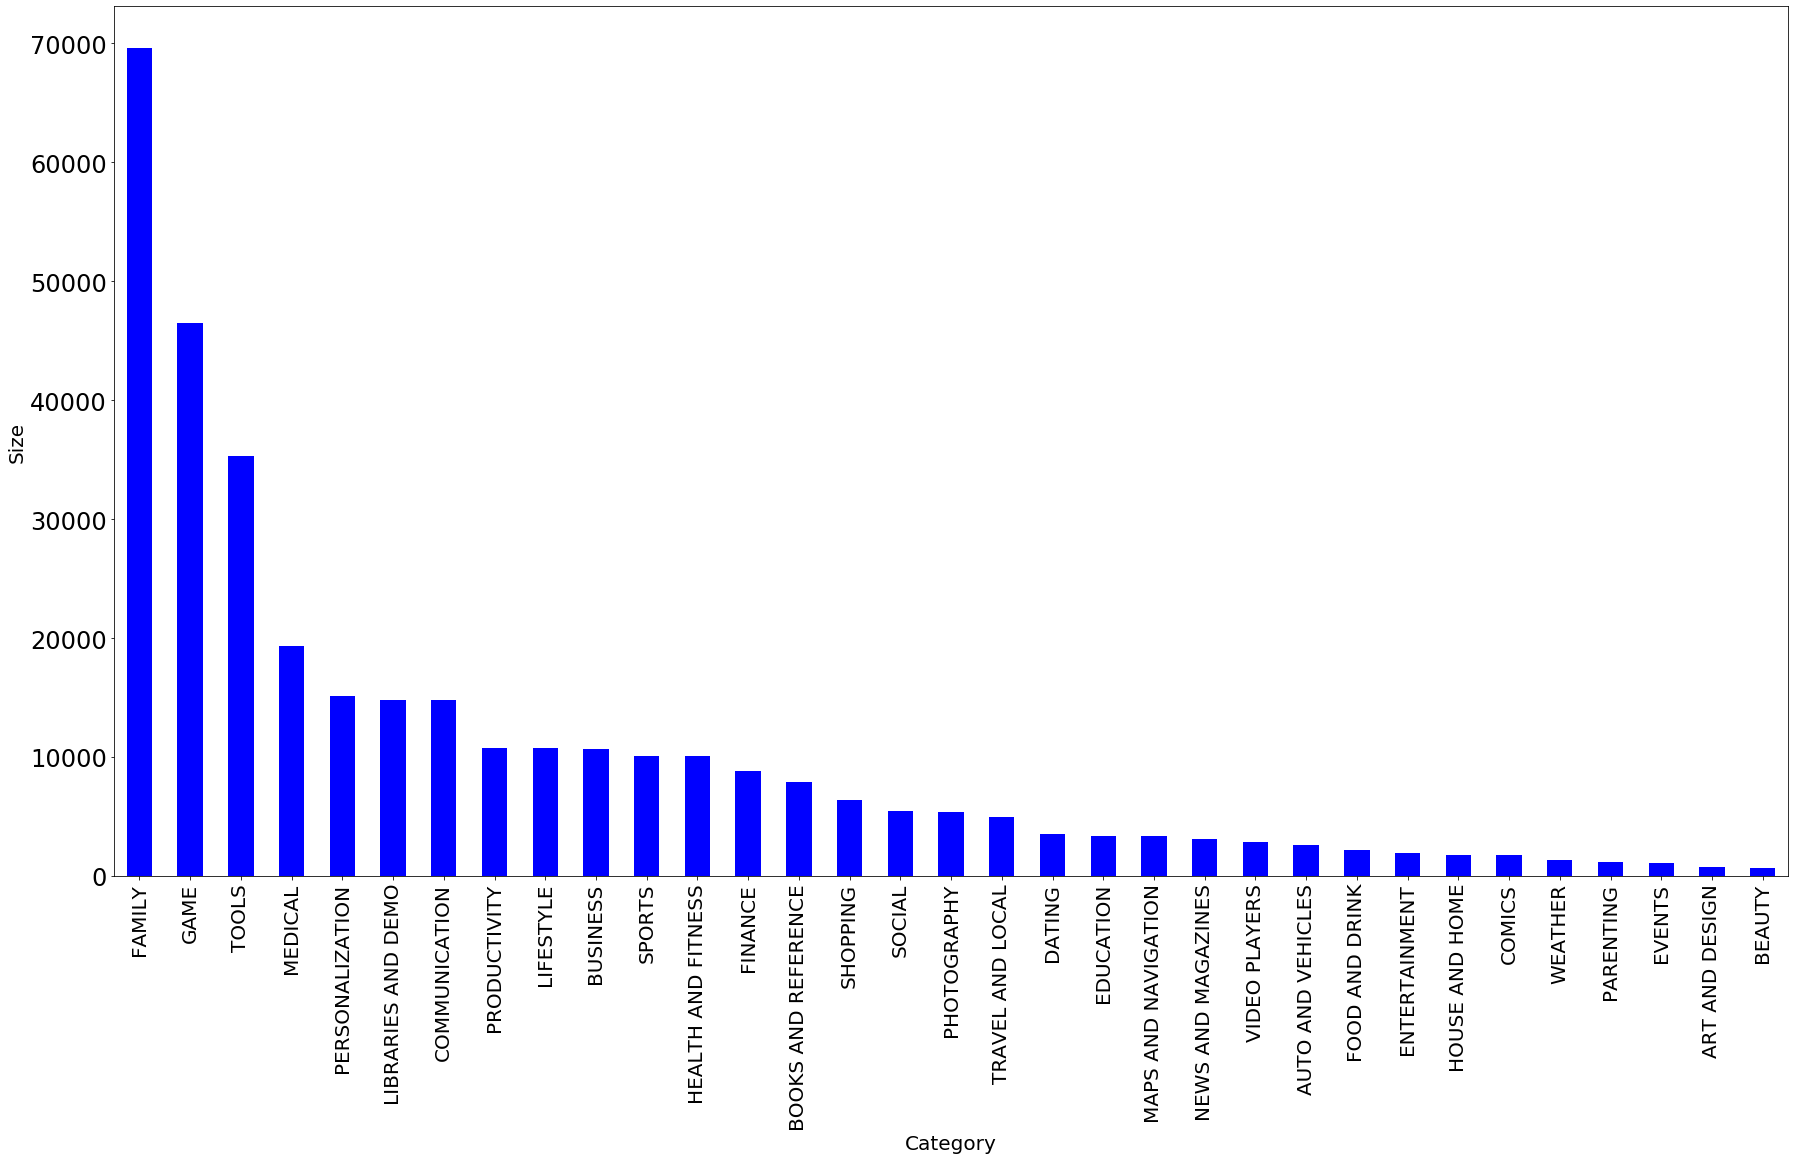

In [26]:
# Most Popular Category

df_1.loc[df_1['Size'] == 'Varies with device'].shape
unwanted = df_1.loc[df_1['Size'] == 'Varies with device']
unwanted.shape
df_1.drop(unwanted.index,inplace = True)

#Remove them inorder to convert the size column to numerics
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('M',''))
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('k',''))
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('+',''))

#Converting Size column to numerics
df_1['Size'] = pd.to_numeric(df_1['Size'],errors='coerce')
res = df_1.groupby('Category')['Size'].sum().reset_index()
finaldata = res.sort_values('Size', ascending=False).reset_index(drop=True)

ind = finaldata.set_index("Category", inplace = True)
bar = finaldata.plot(kind='bar',figsize=(30, 16), color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 20)
plt.xlabel("Category", fontsize = 20)
plt.ylabel("Size", fontsize = 20)

# EDA

In [27]:
 # Data Visualizataion

def compute_app_types(df):

    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
 
  
    vc_rating = df.Category.value_counts()
cat_free_apps = []
cat_paid_apps = []
for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)
        f, ax = plt.subplots(2,1)
    
ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):

# Plot the mean of a target column (Numeric) groupped by the group column (categorical)

    order = sorted(list(set(df_1[group_col])))
stats = df.groupby(group_col).mean()[target_col]
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
ax.set(ylim=(3.8, 4.5))  
ax.tick_params(labelrotation=90)
return stats

NameError: name 'vc_rating' is not defined

In [ ]:
# fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
# plt.suptitle('Count plots')
# sns.countplot(y='Category',df_1=df_1,ax=ax1)
# sns.countplot('Type',data=data,ax=ax2)
# sns.countplot('Content Rating',data=data,ax=ax3)
# plt.show()

In [28]:
data_filter = df_1[['Rating', 'Type', 'Category']]
# Describe Rating dataframe
plot_app_types(data_filter)

In [29]:
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

NameError: name 'plot_target_by_group' is not defined

# Size Vs Rating 

In [30]:
df_1['Rating'] = df_1['Rating'].astype(str).astype(float)

In [31]:
df_1 = df_1[df_1['Installs'] != 'Free']
df_1 = df_1[df_1['Installs'] != 'Paid']
df_1['Installs'] = df_1['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df_1['Installs'] = df_1['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df_1['Installs'] = df_1['Installs'].apply(lambda x: int(x))

In [32]:
df_1['Price'] = df_1['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df_1['Price'] = df_1['Price'].apply(lambda x: float(x))

In [33]:
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df_1['Size'] = df_1['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df_1['Size'] = df_1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df_1['Size'] = df_1['Size'].apply(lambda x: float(x))

In [35]:
avg_rate = df_1.groupby('Category', as_index=False)['Rating'].mean()

In [36]:
avg_rate_data = [go.Histogram(
        x = df_1.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating:', np.mean(df_1['Rating']))
py.offline.iplot(avg_rate_data, filename='rating_dist')

Average app rating: 4.191757420456978


In [37]:
def box_plot(datas):
    traces = []
    a = avg_rate['Category'].tolist()
    for i in range(33):
        y = np.array(datas[datas['Category'] == a[i]].Rating)
        trace = go.Box(
                    y=y,
                    name = a[i]
                )
        traces.append(trace)
    layout = go.Layout(
    title='',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        
        )
    )
)    
    data_avg_rating = traces
    fig = go.Figure(data=data_avg_rating, layout=layout)
    plot_url = py.iplot(fig, filename='avg_rating-plot') 

In [38]:
box_plot(df_1)

In [39]:
import plotly.graph_objs as go

x0 = df_1[df_1['Type'] == 'Free']['Rating']
x1 = df_1[df_1['Type'] == 'Paid']['Rating']

trace0 = go.Box(
    x=x0,
    name='Free'
)
trace1 = go.Box(
    x=x1,
    name='Paid'
)
data_type_rating = [trace0, trace1]
py.iplot(data_type_rating)

y0 = df_1[df_1['Type'] == 'Free']['Size']
y1 = df_1[df_1['Type'] == 'Paid']['Size']

trace0 = go.Box(
    y=y0,
    name='Free'
)
trace1 = go.Box(
    y=y1,
    name='Paid'
)
data_type_rating = [trace0, trace1]
py.iplot(data_type_rating)

In [40]:
trace0 = go.Scatter(
    x=df_1[df_1['Type']=='Free']['Rating'],
    y=df_1[df_1['Type']=='Free']['Size'],
   name='Free',
   mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
   )
)
trace1 = go.Scatter(
    x = df_1[df_1['Type']=='Paid']['Rating'],
    y = df_1[df_1['Type']=='Paid']['Size'],
    name='Paid',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
   )
)
layout = dict(title = 'Size Vs Rating',
              yaxis = dict(zeroline = False, title='Size'),
              xaxis = dict(zeroline = False, title='Rating')
             )

data_sc = [trace0, trace1]

fig = dict(data=data_sc, layout=layout)
py.iplot(fig, filename='size-scatter')

# Price

In [41]:
# Data to plot
labels = df_1['Type'].value_counts(sort = True).index
values = df_1['Type'].value_counts(sort = True)

data_pie1 = [go.Pie(
        labels = labels.tolist(),
        values = values.tolist(),
        hoverinfo = 'label+value',
        name= ''
    
)]

py.offline.iplot(data_pie1, filename='active_category1')


In [42]:
avg_size=df_1.groupby('Type', as_index=False)['Size'].mean()

In [43]:
import plotly.figure_factory as ff

data_bul = (
  {"label": "Free", "range": [1, 50, 100], "performance": [20,50], "point": [21.7]},
  {"label": "Paid", "range": [1, 50, 100], "performance": [20,50],"point": [19.3]}
)
measure_colors=['rgb(63,102,153)', 'rgb(120,194,195)']
range_colors=['rgb(245,225,218)', 'rgb(241,241,241)']

fig = ff.create_bullet(
    data_bul, titles='label', markers='point', measures='performance', title='Average Size in MB of free and paid apps',
    ranges='range', orientation='v', range_colors=range_colors, width=800,measure_colors=measure_colors
)
py.iplot(fig, filename='bulletchart_size')

In [44]:
df_1.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART AND DESIGN     4.1   
1                                Coloring book moana  ART AND DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART AND DESIGN     4.7   
3                              Sketch - Draw & Paint  ART AND DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART AND DESIGN     4.3   

    Reviews  Size  Installs  Type  Price Content Rating  \
0     159.0  19.0     10000  Free    0.0       Everyone   
1     967.0  14.0    500000  Free    0.0       Everyone   
2   87510.0   8.7   5000000  Free    0.0       Everyone   
3  215644.0  25.0  50000000  Free    0.0           Teen   
4     967.0   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

# Sentiment Analysis 

In [45]:
df_2.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [46]:
df_2 = df_2.dropna()
df_2.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

In [47]:
df_2['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [48]:
df_2.Sentiment[df_2.Sentiment =='Positive'] = 0
df_2.Sentiment[df_2.Sentiment =='Neutral'] = 1

df_2.Sentiment[df_2.Sentiment =='Negative'] = 2
df_2.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0         0                1.00                0.533333  
1         0                0.25                0.288462  
3         0                0.40                0.875000  
4         0                1.00                0.300000  
5         0                1.00                0.300000

In [49]:
df_2.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [50]:
df_2['Sentiment'] = df_2['Sentiment'].astype('int')

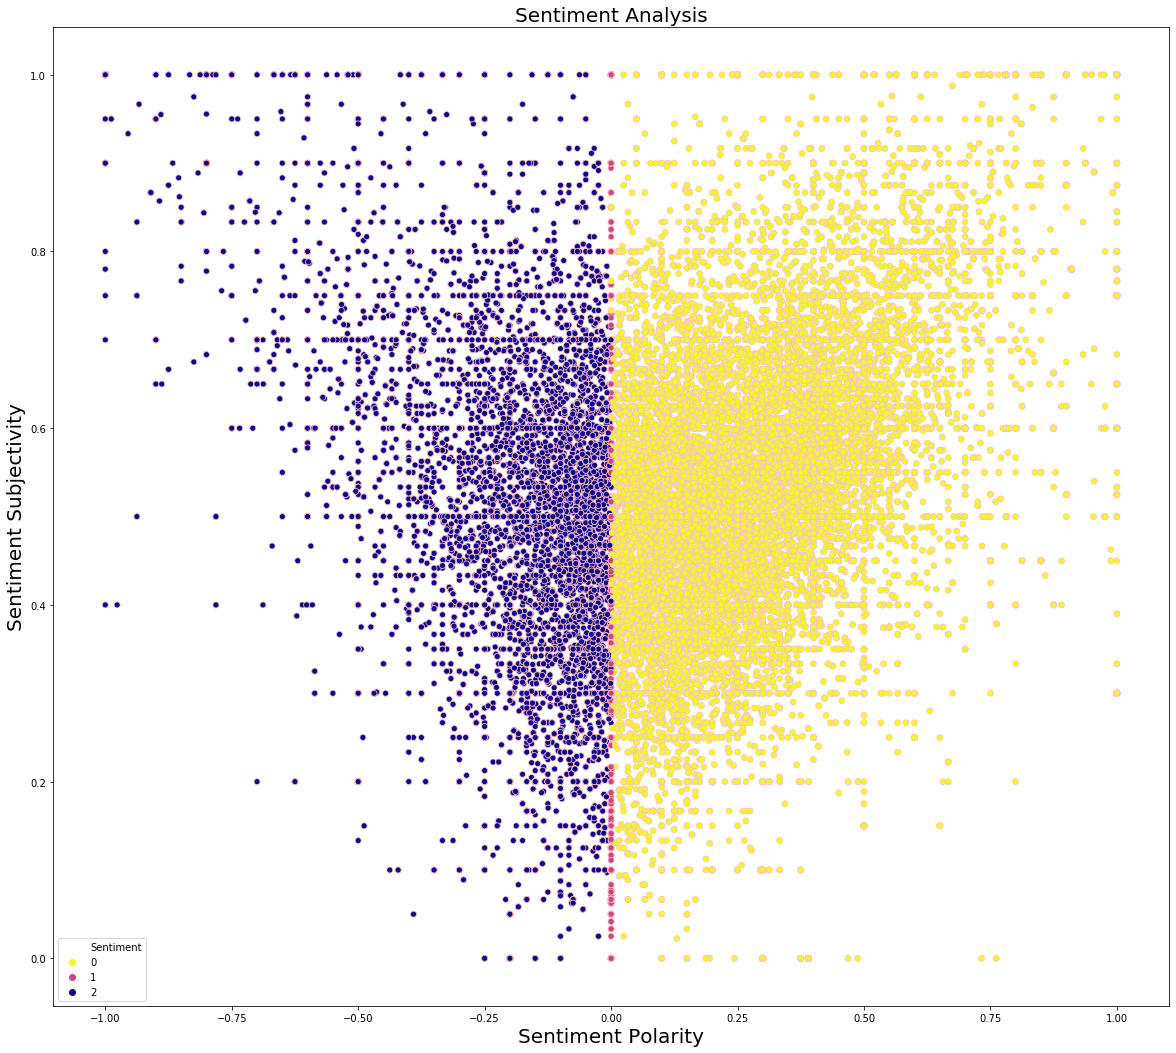

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
j = sns.scatterplot(df_2['Sentiment_Polarity'],df_2['Sentiment_Subjectivity'],hue=df_2['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()

In [52]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [53]:
df_2.shape

(37427, 5)

In [54]:
df_2["index"] = range(0,37427)
df_2 = df_2.set_index("index")
df_2.head()

App  \
index                          
0      10 Best Foods for You   
1      10 Best Foods for You   
2      10 Best Foods for You   
3      10 Best Foods for You   
4      10 Best Foods for You   

                                       Translated_Review  Sentiment  \
index                                                                 
0      I like eat delicious food. That's I'm cooking ...          0   
1        This help eating healthy exercise regular basis          0   
2             Works great especially going grocery store          0   
3                                           Best idea us          0   
4                                               Best way          0   

       Sentiment_Polarity  Sentiment_Subjectivity  
index                                              
0                    1.00                0.533333  
1                    0.25                0.288462  
2                    0.40                0.875000  
3                    1.00                0.300000  
4                    1.00                0.300000

In [55]:
pip install stop-words

Note: you may need to restart the kernel to use updated packages.


In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,37427):
    review = re.sub('[^a-zA-Z]', ' ',df_2['Translated_Review'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',df_2['Translated_Review'][i])
    review = re.sub('[^0-9a-z #+_♥️]', ' ',df_2['Translated_Review'][i])#Remove bad symbols
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)
corpus

['like eat delici food hat cook food case 10 est ood help lot also est efor helf ife',
 'help eat healthi exercis regular basi',
 'ork great especi go groceri store',
 'est idea us',
 'est way',
 'maze',
 'ook forward app',
 'help site help food get',
 'good',
 'seful inform amount spell error question valid inform share nce fix 5 star given',
 'hank reat app dd arthriti eye immun kidney liver detox food pleas',
 'reatest ever omplet awesom maintain health must ppl ove',
 'ood health ood health first prioriti',
 'ealth import world either life think',
 'rs sunita bhati thank develop make kind app realli good healthi food bodi',
 'eri seful diabet age 30 need control sugar thank',
 'ne greatest app',
 'good nice',
 'ealthi ealli help',
 'od health',
 '5',
 'n excel use',
 'found lot wealth form health',
 'ecaus found import',
 'ealthi ate',
 'eri good impli good',
 'n test',
 'ood',
 'hank advic ownload dobe reader still get recip book',
 'recip book nabl recip book',
 'bsolut abul heno

In [ ]:
words = []
Sentiment_Polarity=[]
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
    Sentiment_Polarity.append
words

In [ ]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

In [ ]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()

In [ ]:
k = most_commmom_wordList[0:30]
Sentiment_Polarity=[]
Positive=[]
Neutral=[]
Negative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
        #if i in z:
            #Sentiment.append(Data['Sentiment_Polarity'][corpus.index(z)])
    #Sentiment_Polarity.append(Sentiment)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Positive':
            Positive.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Negative':
            Negative.append(i)

In [ ]:
f,ax = plt.subplots(3,1,figsize=(20,40))
c1 = sns.countplot(Positive, ax=ax[0])
c2 = sns.countplot(Neutral,ax=ax[1])
c3 = sns.countplot(Negative,ax=ax[2])
ax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviw",fontsize=20)
ax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviw",fontsize=20)
ax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviw",fontsize=20)
plt.show()


# Modeling 

In [ ]:
df_2.head()

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews["review_clean"] = reviews["Translated_Review"].apply(lambda x: clean_text(str(x)))